# Haberman Dataset 

Author : Praveen K

### Preface


This is Haberman Dataset which contains the cancer patient details who undergone for the treatment.

It contains 305 rows and 4 columns.

Ths Data has four features. 'Age','Op_Year','axil_nodes_det' and 'Surv_status'





#### Attributes/Features Information

1. Age     : Numberical values
             It provides the age of the patients.
         
2. Op_Year : Numberical values
             It porvides year when a patient undergone for surgery.
             It helps us to understand how the cancer treatement got improved year to year.
         
3. axil_nodes_det : Numberical values
               It gives the no of positive axillary nodes.
      
4. Surv_status : Numberical values Either 1 or 2.
                1 represents the patient got survived.
                2 represents the patient is not survived.
                
#### Dependent and InDependent

Independent      : 3 -features

                    1. Age  2. Op_Year 3. axil_nodes_det 
                    
Dependent/Label  : Surv_status 



                  


### Object :
Our aim is to create a machine leanring model which can determine/predict Survival status of the patient

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Here, we have imported all the required packages above.

In [73]:
raw_data = pd.read_csv("haberman.csv")#Relative Path since File is @ my local
raw_data.head(3)

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1


Header with column names are missing. 
 
Coloumn names are very important to define the each data dataframe,

Such that we can start working on the dataset with a clear picture of which values are corresponds to which realtime feature.
 
Hence, it is manditory to add the columns names explicityly.
 
Let us add the Column names to the Data frame 

In [74]:
raw_data.columns = ["Age", "Op_Year", "axil_nodes_det", "Surv_status" ]
raw_data.head()

,Age,Op_Year,axil_nodes_det,Surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


Now, we can clearly understand features and also easiy to denote the data while we are exploring through the Dataset.

In [75]:
raw_data.shape   # The data set has 305 rows with 4 columns   305 x 4

(305, 4)

We have Both Independent and Dependent Features.

We no need the disturb the Dependent label Column in the Dataframe

We have 4 features with 305 data points, let's segregate the dependent and independent feautres of the dataset.

By this we will be able to proceed with the (independet)Features Vizualization and Pre-processing

In [76]:
x = raw_data.iloc[:, 0:3]   

In [77]:
x.head()
#np.array(raw_data.iloc[:, 0:4])

,Age,Op_Year,axil_nodes_det
0,30,62,3
1,30,65,0
2,31,59,2
3,31,65,4
4,33,58,10


"Age , Op_Year, axil_nodes_det" are three Independent Feautures in our dataset

In [78]:
y = raw_data.iloc[:, 3]
y.head()
#np.array(raw_data.iloc[:, 0:4])

0    1
1    1
2    1
3    1
4    1
Name: Surv_status, dtype: int64

"Surv_status" dependent Feautures in our dataset. It is a numeric feature we have to convert into categorical

Let us verify our Distinct values and their counts of the Label 

In [79]:
print( raw_data['Surv_status'].value_counts())

1    224
2     81
Name: Surv_status, dtype: int64


#### Observation:

1.We have two distinct Classes 1 or 2. 1 represents the Survival and 2 represents the Non Surevival.

2.Almost 64% of patients are survived and 36% are not 

Hence, we can understand the Data is not balanced

Let us verifty if there exists the null values in the dataset

In [80]:
#remove nulls
x = np.array(raw_data.isna() == True)

if True in x:
    print("NuLl Values exists")
else:
    print("We dont have nuLl values exists")
     

We dont have nuLl values exists


With this we can understand all the values and valid and no null exists.

Hence, no need to apply any mathematical operation replace/delete the values.


## EXPLORATORY DATA ANALYSIS (EDA)

let us plot the data to understand the patterns.

This Helps us to land where we can distinguish the Survived and Non Survived patients and their characteristics Geometrically.

In [81]:
# let recollet the independent values that I have
raw_data.columns

Index(['Age', 'Op_Year', 'axil_nodes_det', 'Surv_status'], dtype='object')

#### Scattered Plots

Scattered Plots 2 Dimentional graphs, with which we can able to the see the data distribution of any two features.

It is easy to undderstand the Scattered plot.

X axis is represent a feauter and the Y axis represent another.

For each conjuction of to features for all the queried points in the Dataset, it will set a dot (point).

That way we are able to understand the spread of feature(X) with respective to the other(Y).

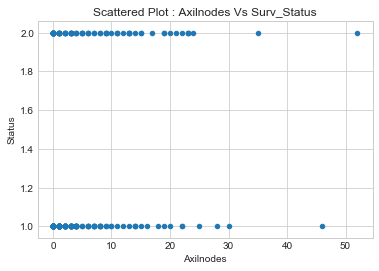

In [82]:
raw_data.plot(kind = 'scatter' , x = 'axil_nodes_det' , y= 'Surv_status' )
plt.title('Scattered Plot : Axilnodes Vs Surv_Status')
plt.ylabel('Status')
plt.xlabel('Axilnodes')
plt.show()

From the Above graph we can understand that most of the vainace of the data is from 0 to 20

The we can not draw specific boundary  for the survival with repsective to the Axilnodes

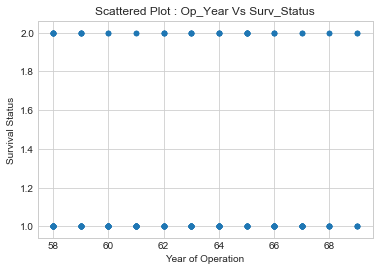

In [83]:
raw_data.plot(kind = 'scatter' , x = 'Op_Year' , y= 'Surv_status' )
plt.title('Scattered Plot : Op_Year Vs Surv_Status')
plt.ylabel('Survival Status')
plt.xlabel('Year of Operation')
plt.show()

From the Above graph we can understand that most of the vainace of the feature Opr_Year is started from 59 and to 72

Here we can not draw specific boundary for the survival with repsective to the Year of Operation.

### 2D- Colored Scattered Plots

In the Normal Scatered plot we can only explore a single feature with respective to the other

Where as in the Colored Scattered Plot we can examine any two features with respective to the other Label/feature .

Eah color represents a class in Label.

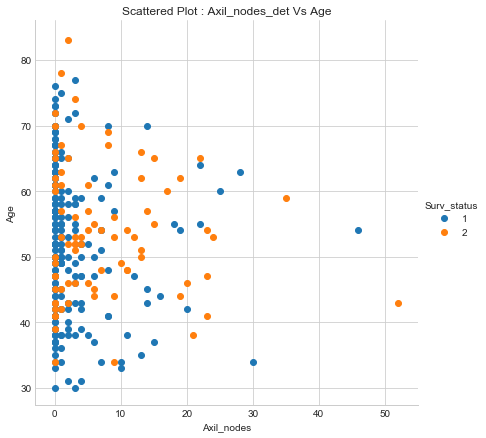

In [84]:
## 'Age', 'Op_Year', 'axil_nodes_det', 'Surv_status' : 
sns.set_style("whitegrid")
sns.FacetGrid(raw_data , hue= 'Surv_status' , size = 6 )\
    .map(plt.scatter,  'axil_nodes_det' , 'Age')\
    .add_legend() 
plt.title('Scattered Plot : Axil_nodes_det Vs Age')
plt.ylabel('Age')
plt.xlabel('Axil_nodes')
plt.show()

#g = sns.FacetGrid(tips, col="time",  hue="smoker")
#g = (g.map(plt.scatter, "total_bill", "tip", edgecolor="w").add_legend())
#

We are Unable to distinguish the classes of the Surv_status with respective to Axil_nodes_deta Vs Age of the Patients

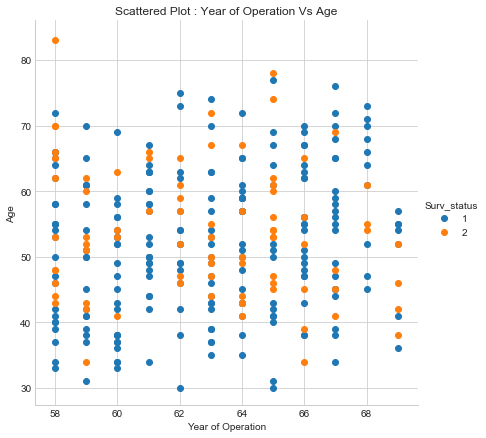

In [85]:
# 'Age', 'Op_Year', 'axil_nodes_det', 'Surv_status' : 
sns.set_style("whitegrid")
sns.FacetGrid(raw_data, hue= "Surv_status", size = 6)\
    .map(plt.scatter,  'Op_Year' , 'Age')\
    .add_legend() 
plt.title('Scattered Plot : Year of Operation Vs Age')
plt.ylabel('Age')
plt.xlabel('Year of Operation')
plt.show()


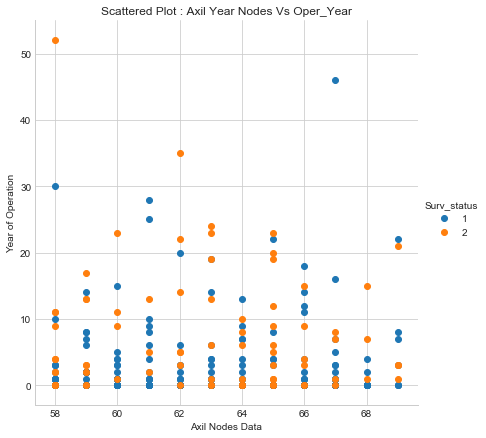

In [86]:
sns.set_style("whitegrid")
sns.FacetGrid(raw_data, hue="Surv_status" , size= 6)\
    .map(plt.scatter, 'Op_Year' , 'axil_nodes_det' )\
    .add_legend()
plt.title('Scattered Plot : Axil Year Nodes Vs Oper_Year')
plt.ylabel('Year of Operation')
plt.xlabel('Axil Nodes Data')
plt.show()
plt.close()

##### Observation :         

From the Above Graphs We are Unable to figre out a specic pattern to estiblish the relation.

So, Let us plot the "Pair Plots", since we have few (only 3) no.of features.

### Pair Plots 

To find the relatoinship between the features, in all the features combinations.

We will get plot with x-axis, with all the features in combination of y - axis with all the features.

With this we can identify the best combination of the features to identify the positive and negative clasess of Surv_status.

In [87]:
 raw_data['Surv_status'] = raw_data['Surv_status'].astype(int)

In [88]:
cols = list(raw_data.columns )
cols.remove('Surv_status')
cols

['Age', 'Op_Year', 'axil_nodes_det']

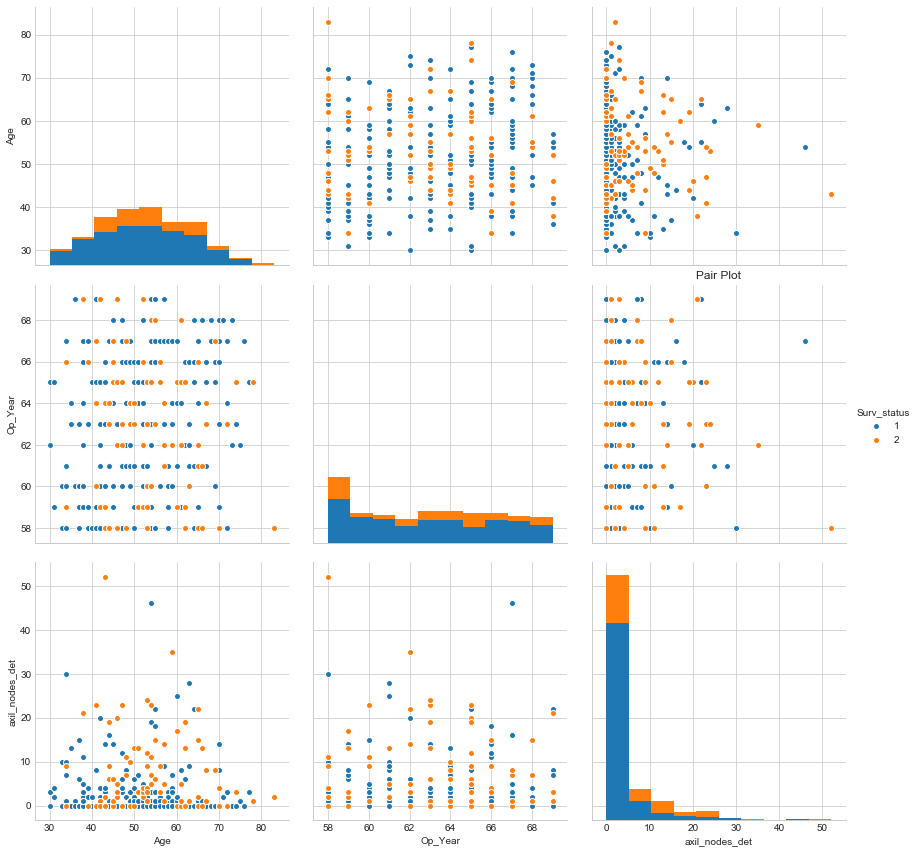

In [89]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(raw_data, hue="Surv_status", vars=cols, size=4);
plt.title('Pair Plot')
plt.show()
plt.close()

No Way that we can figure out the seperation between the Survivals and Non-Survival classes.

Let's go and the check distribution of the dataset.

So that we will have depict of the data in terms of thier variance

#### PDF, CDF

let us find the data distribution with respecitive to class label.
 
CDF will gives the number of data points got existed per each bin.

PDF will provides the information how much percentage.

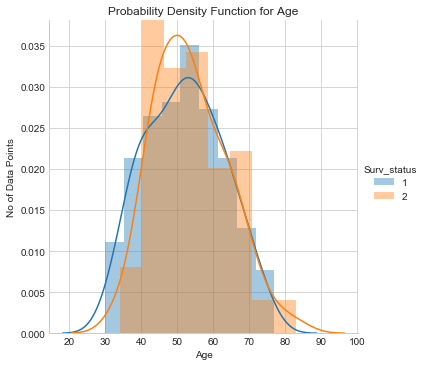

In [90]:
#['Age', 'Op_Year', 'axil_nodes_det', 'Surv_status']
sns.set_style()
sns.FacetGrid(raw_data, hue='Surv_status' , size = 5)\
    .map(sns.distplot, 'Age')\
    .add_legend()
plt.title('Probability Density Function for Age')
plt.ylabel('No of Data Points')
plt.xlabel('Age')
plt.show()
plt.close()

Here Age is not making any difference, Age is overlaping for both Surviaval and Non Survival.

So, it is sensing that Surv_Status of the Cancer patients not Highly dependends upon their Age.           

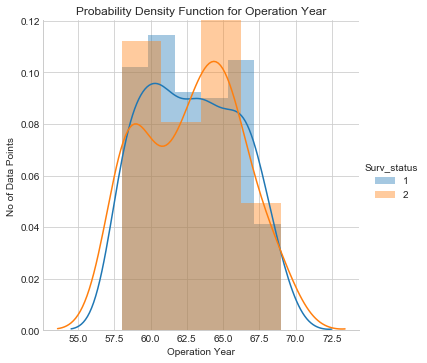

In [91]:
#['Age', 'Op_Year', 'axil_nodes_det', 'Surv_status']
sns.set_style()
sns.FacetGrid(raw_data, hue='Surv_status' , size = 5)\
    .map(sns.distplot, 'Op_Year')\
    .add_legend()
plt.title('Probability Density Function for Operation Year')
plt.ylabel('No of Data Points')
plt.xlabel('Operation Year')
plt.show()
plt.close()

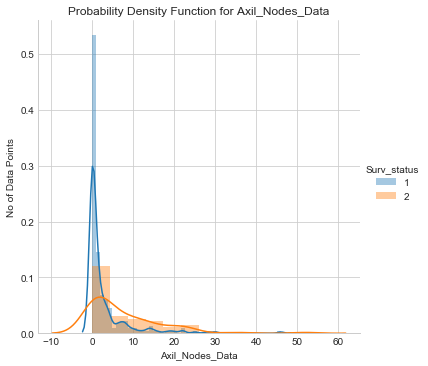

In [92]:
sns.FacetGrid(raw_data, hue='Surv_status' , size = 5)\
    .map(sns.distplot, 'axil_nodes_det')\
    .add_legend()
plt.title('Probability Density Function for Axil_Nodes_Data')
plt.ylabel('No of Data Points')
plt.xlabel('Axil_Nodes_Data')
plt.show()
plt.close()

### Observation

We have 63% of data is class 1.

Based on the axil_nodes distribution.

For the class 1, most of data distribution is between 0 to 4.5 Offcourse there is a Overlaping.

For the class 2, most of data distribution is between 0 to 26.

By this, We can clearly Conclude that 

If Axil_nodes Value is less than or equal to 4.5 then this is  Class 1.
            
So,lets find out probability of the axil_nodes data exists between -0.4 to 5 using cdf       

In [93]:
Status_One = raw_data.loc[raw_data.Surv_status == 1];
Status_Two = raw_data.loc[raw_data.Surv_status == 2];

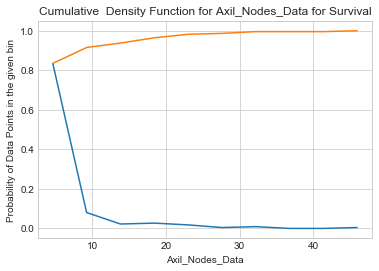

In [94]:
#Plot CDF 
#['Age', 'Op_Year', 'axil_nodes_det', 'Surv_status']
counts, bin_edges = np.histogram(Status_One['axil_nodes_det'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.title('Cumulative  Density Function for Axil_Nodes_Data for Survival')
plt.ylabel('Probability of Data Points in the given bin')
plt.xlabel('Axil_Nodes_Data')
plt.show()
plt.close()

Above plot is a "Cumulative  Density Function for Axil_Nodes_Data" for only Status is Survival

Probability of Data Points in the given bin is shown on the y-axis and the bins of 'Axil_Nodes_Data' are on the x-axis.


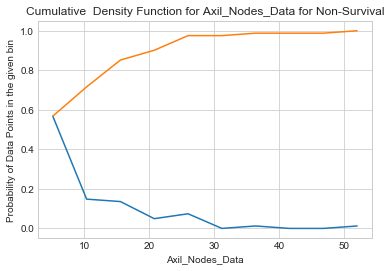

In [95]:
counts, bin_edges = np.histogram(Status_Two['axil_nodes_det'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.title('Cumulative  Density Function for Axil_Nodes_Data for Non-Survival')
plt.ylabel('Probability of Data Points in the given bin')
plt.xlabel('Axil_Nodes_Data')
plt.show()
plt.close()


Above plot is a "Cumulative  Density Function for Axil_Nodes_Data" for only Status is Non-Survival

Probability of Data Points in the given bin is shown on the y-axis and the bins of 'Axil_Nodes_Data' are on the x-axis.


## Conclusion

By Observing both categories,label 1 and 2 distributions with respective to axil_nodes_det

Probability of the dataset is More than 81 percent where the axil_nodes_det is between 0 to 4.5


#### Boxplot

Let us Cross verify our final conclusion with the BoxPlot

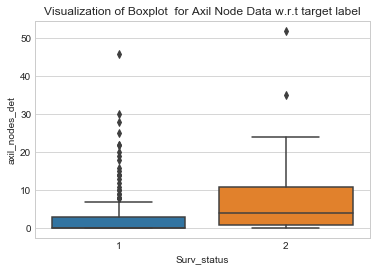

In [96]:
#['Age', 'Op_Year', 'axil_nodes_det', 'Surv_status']
sns.boxplot(x='Surv_status', y='axil_nodes_det' , data=raw_data)
plt.title('Visualization of Boxplot  for Axil Node Data w.r.t target label')
plt.show()

We can observe the Data Quratiles are Overlaping.

Let us check the box plot for the Surv_status vs Op_Year

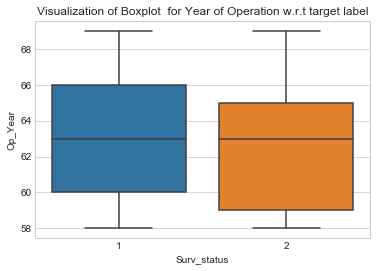

In [97]:
sns.boxplot(x='Surv_status', y='Op_Year' , data=raw_data)
plt.title('Visualization of Boxplot  for Year of Operation w.r.t target label')
plt.show()

We can observe the Data Quratiles are Almost Equally distributed.

Let us check the box plot for the Surv_status Vs Age

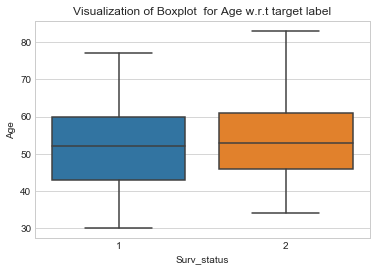

In [98]:
sns.boxplot(x='Surv_status', y='Age' , data=raw_data)
plt.title('Visualization of Boxplot  for Age w.r.t target label')
plt.show()

We can observe the Data Quratiles are Almost Equally distributed.

Let us check the box plot for the Surv_status Vs Age

Observing all the box plots above.

It is very clear that the Probability of getting class 1 is More than 81 percent where the axil_nodes_det is between 0 to . 

But Again we are Perfectly can not make a Conclusion, since the data is Imabalanced

### Violin Plot 

Violin plots are nothing but the combination of Boxplots and the cdf (Data distributions).

Vertical line will gives you the information about the Boxplot and the horizantal is the for probability data distribution.

Yes, as we have seen the both plots individually about, this Violin plot may not much helpful us to distignush the class values

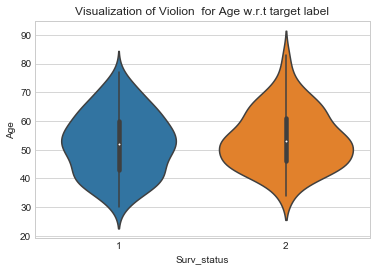

In [99]:
plt.close()
sns.violinplot(x= "Surv_status" , y="Age" , data=raw_data , size = 8)
plt.title('Visualization of Violion  for Age w.r.t target label')
plt.show()

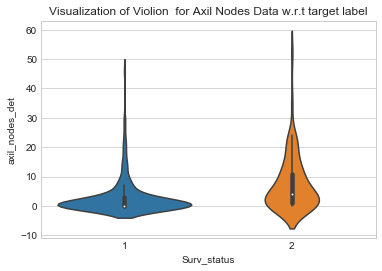

In [100]:
plt.close()
sns.violinplot(x='Surv_status' , y='axil_nodes_det' ,  data =raw_data, size=8)
plt.title('Visualization of Violion  for Axil Nodes Data w.r.t target label')
plt.show()

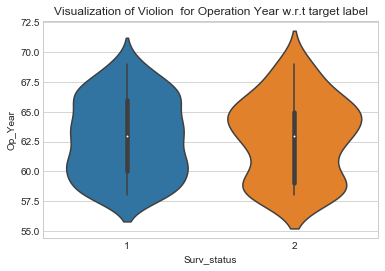

In [101]:
plt.close()
sns.violinplot(x='Surv_status' , y='Op_Year', data=raw_data , size=8 )
plt.title('Visualization of Violion  for Operation Year w.r.t target label')
plt.show()

### Final Observation

Since the data is Imbalanced and scatteredly distirbuted  we can not distiguish the class labels with our Exploratory Analysis